In [1]:
import sys
sys.path.append('../training_performance')

import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read

from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du

from plot_trials_info import *
from plot_days_info import *

import seaborn as sns
import pandas as pd
# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-09-20 14:41:54,410][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-09-20 14:41:55,241][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [4]:
animals = [
    "R013",
    "R014",
    "R015",
]
n_animals = len(animals)
df = create_trials_df_from_dj(animal_ids=animals).query("stage == 10")

fetched 59 sessions for R013 between 2023-07-14 and 2023-09-20
fetched 59 sessions for R014 between 2023-07-14 and 2023-09-20
fetched 59 sessions for R015 between 2023-07-14 and 2023-09-20


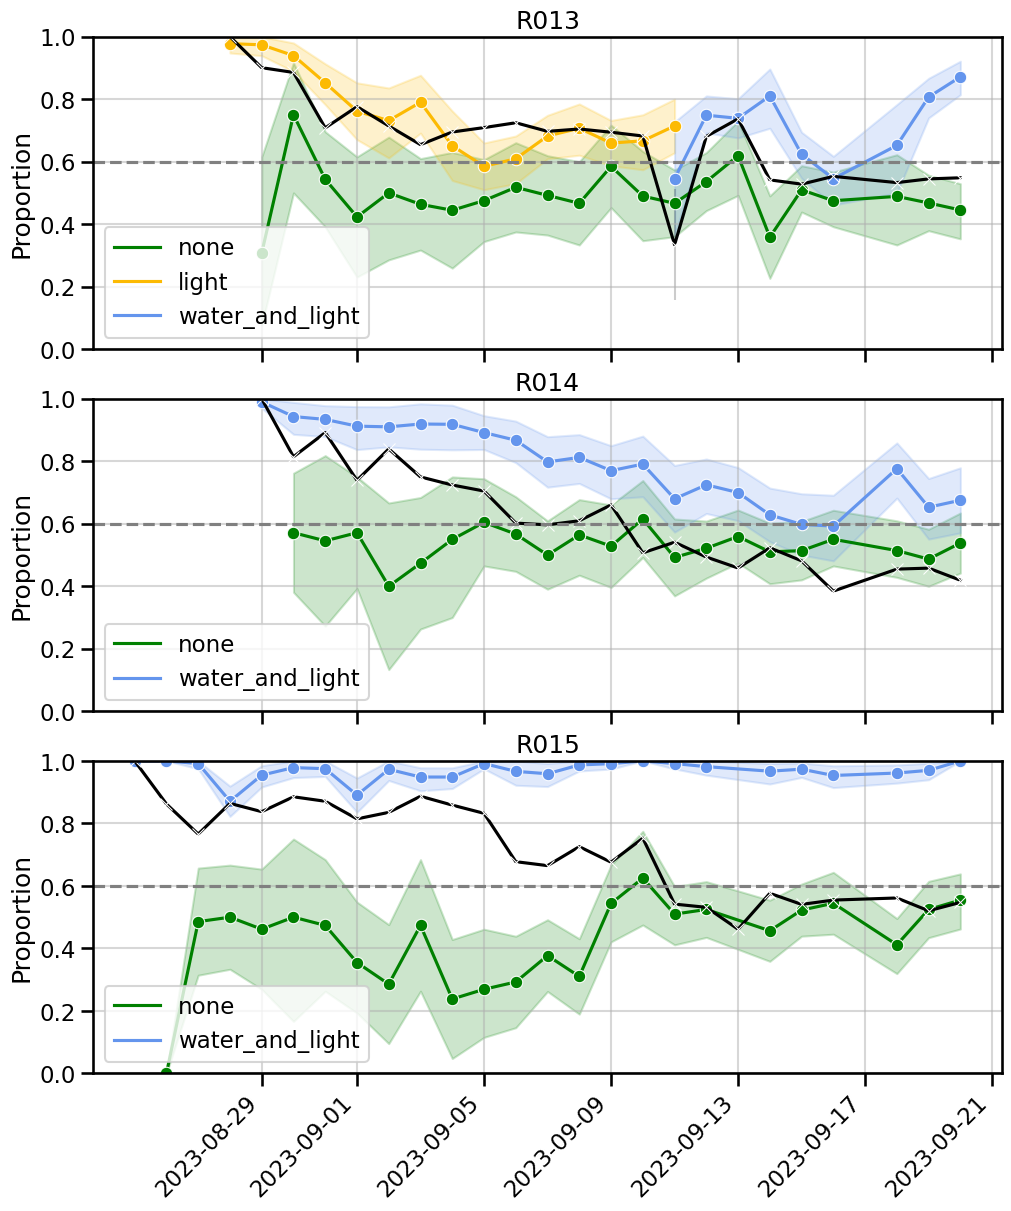

In [25]:
fig, ax = plt.subplots(
    n_animals,
    1,
    figsize=(
        10,
        4 * n_animals,
    ),
    constrained_layout=True,
    sharex=True,
)
for ii, (animal, sub_df) in enumerate(df.groupby("animal_id")):
    # legend = False if ii != 0 else True
    label = False if ii != n_animals - 1 else True

    plot_performance_by_give(
        sub_df,
        ax=ax[ii],
        title=animal,
        xaxis_label=label,
    )
    ticks = ax[2].get_xticks()
    ax[2].set_xticks(ticks)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), ha="right", rotation=45)

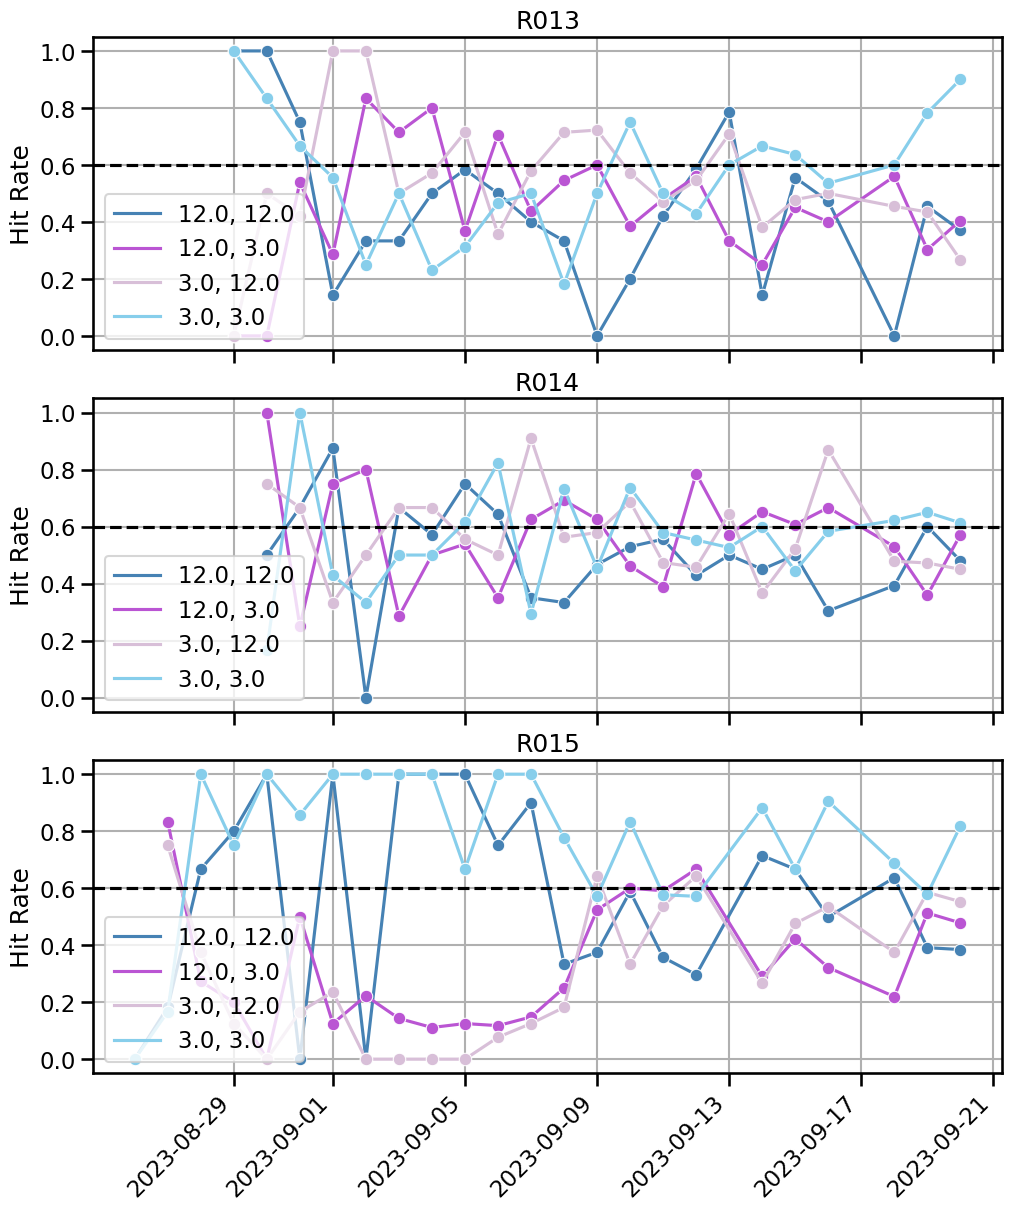

In [19]:
fig, ax = plt.subplots(
    n_animals,
    1,
    figsize=(
        10,
        4 * n_animals,
    ),
    constrained_layout=True,
    sharex=True,
)
for ii, (animal, sub_df) in enumerate(df.groupby("animal_id")):
    # legend = False if ii != 0 else True
    label = False if ii != n_animals - 1 else True

    plot_non_give_stim_performance(
        sub_df,
        ax=ax[ii],
        title=animal,
        xaxis_label=label,
    )
    ticks = ax[2].get_xticks()
    ax[2].set_xticks(ticks)
    ax[2].set_xticklabels(ax[2].get_xticklabels(), ha="right", rotation=45)